# Modelos Avanzados No supervisados

Dataset :  https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [106]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import NMF, PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

from umap import UMAP

import seaborn as sns

sns.set_style("whitegrid")

In [3]:
customer_data_raw = pd.read_csv("../data/raw/Mall_Customers.csv")
customer_data_raw

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Software para el ejercicio

In [148]:
class UnsupervisedProcessor:

    def __init__(self, 
                 dataframe: pd.DataFrame,
                 scaler,
                 cluster_algorithm,
                 dim_reduction_algorithm,
                ) -> None:
        self.original_data = dataframe
        self.cluster_pipeline = Pipeline(
            steps=[
                ("scaler", scaler),
                ("cluster_algorithm", cluster_algorithm)
            ]
        )
        self.dim_reduction_pipeline = Pipeline(
            steps=[
                ("scaler", scaler),
                ("dim_reduction", dim_reduction_algorithm)
            ]
        )

    def __process_clustering(self, columns: list) -> pd.DataFrame:

        tmp_data_to_process = self.original_data[columns]
        self.cluster_pipeline.fit(tmp_data_to_process)
        clustering_df = pd.concat(
            [
                self.original_data[["CustomerID"]],
                self.original_data[self.original_data.columns[-3:]],
                pd.DataFrame(
                    self.cluster_pipeline.steps[1][1].labels_,
                    columns=["cluster"]
                )
            ],
            axis=1
        )

        return clustering_df

    def __process_dim_reduction(self, columns: list) -> pd.DataFrame:

        tmp_data_to_process = self.original_data[columns]
        return pd.concat(
            [
                self.original_data[["CustomerID"]],
                pd.DataFrame(
                    self.dim_reduction_pipeline.fit_transform(tmp_data_to_process),
                    columns=["dim1", "dim2"]
                )
            ],
            axis=1
        )

    def run(self, columns: list) -> pd.DataFrame:

        _cluster_results = self.__process_clustering(columns=columns)
        _dim_reduction_results = self.__process_dim_reduction(columns=columns)

        return _cluster_results.merge(_dim_reduction_results,on="CustomerID")
        

def plot_results(data: pd.DataFrame):
    sns.scatterplot(x="dim1", y="dim2", data=df_final, hue="cluster",palette="tab10")

def calculate_clustering_metrics(data: pd.DataFrame):

    print(
        f"""
        Métrica Silloutte: {silhouette_score(X=data[customer_data_raw.columns[-3:]], labels=np.array(data['cluster']))}
        Métrica calinski_harabasz: {calinski_harabasz_score(X=data[customer_data_raw.columns[-3:]], labels=np.array(data['cluster']))}
        Métrica davies_bouldin: {davies_bouldin_score(X=data[customer_data_raw.columns[-3:]], labels=np.array(data['cluster']))}

        """
    )

    plot_results(data=data)
    

In [170]:
processor = UnsupervisedProcessor(
    dataframe=customer_data_raw, 
    scaler=StandardScaler(), 
    cluster_algorithm=DBSCAN(eps=0.7, min_samples=5),
    dim_reduction_algorithm=TSNE(n_components=2)
)

In [171]:
df_final= processor.run(columns=customer_data_raw.columns[-3:])


        Métrica Silloutte: 0.2921060798547292
        Métrica calinski_harabasz: 4.862108288406605
        Métrica davies_bouldin: 3.765189340474708

        


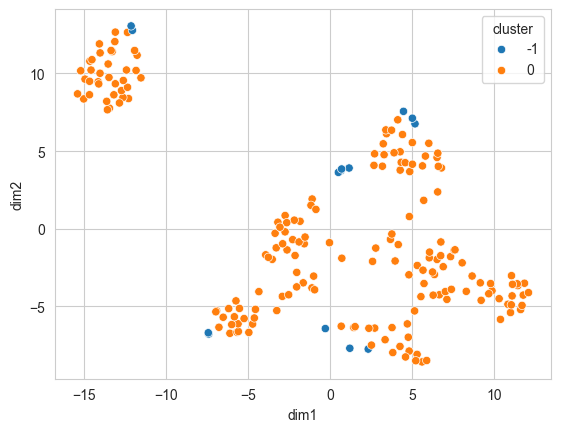

In [172]:
calculate_clustering_metrics(data=df_final)